In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from scipy import stats
import seaborn as sns
import re

In [ ]:
purchase=pd.read_csv('QVI_purchase_behaviour.csv')
transaction=pd.read_excel('QVI_transaction_data.xlsx')

In [ ]:
purchase.head(2)

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream


In [ ]:
transaction.head(2)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3


Convert date

In [ ]:
transaction["DATE"]=pd.to_datetime(transaction["DATE"], origin = "1899-12-30",unit="D")
transaction

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


No null value exist for both datasets

In [ ]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            264836 non-null  datetime64[ns]
 1   STORE_NBR       264836 non-null  int64         
 2   LYLTY_CARD_NBR  264836 non-null  int64         
 3   TXN_ID          264836 non-null  int64         
 4   PROD_NBR        264836 non-null  int64         
 5   PROD_NAME       264836 non-null  object        
 6   PROD_QTY        264836 non-null  int64         
 7   TOT_SALES       264836 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 16.2+ MB


In [ ]:
purchase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


extract pack size

In [ ]:
def pack_size(text):
    pack=re.search(r'(\d+g)', text)
    if pack:
        pack=pack.group(1).replace('g','')
        pack=int(pack)
        return pack
    else:
        return 0

In [ ]:
transaction['pack_size']=transaction['PROD_NAME'].str.lower().apply(pack_size)
transaction

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,pack_size
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150
...,...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,175
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,175
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,170
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,150


remove the outlier

In [ ]:
transaction.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,pack_size
count,264836,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000,264836.000000
mean,2018-12-30 00:52:12.879215616,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200,182.427004
min,2018-07-01 00:00:00,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000,70.000000
25%,2018-09-30 00:00:00,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000,150.000000
50%,2018-12-30 00:00:00,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000,170.000000
75%,2019-03-31 00:00:00,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000,175.000000
max,2019-06-30 00:00:00,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000,380.000000
std,NaN,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226,64.327196


In [ ]:
outlier=transaction[transaction['PROD_QTY']==200]['LYLTY_CARD_NBR'].unique()
transaction=transaction[~transaction['LYLTY_CARD_NBR'].isin(outlier)]
transaction.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,pack_size
count,264834,264834.000000,2.648340e+05,2.648340e+05,264834.000000,264834.000000,264834.000000,264834.000000
mean,2018-12-30 00:52:10.292938240,135.079423,1.355488e+05,1.351576e+05,56.583554,1.905813,7.299346,182.425512
min,2018-07-01 00:00:00,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000,70.000000
25%,2018-09-30 00:00:00,70.000000,7.002100e+04,6.760050e+04,28.000000,2.000000,5.400000,150.000000
50%,2018-12-30 00:00:00,130.000000,1.303570e+05,1.351365e+05,56.000000,2.000000,7.400000,170.000000
75%,2019-03-31 00:00:00,203.000000,2.030940e+05,2.026998e+05,85.000000,2.000000,9.200000,175.000000
max,2019-06-30 00:00:00,272.000000,2.373711e+06,2.415841e+06,114.000000,5.000000,29.500000,380.000000
std,NaN,76.784063,8.057990e+04,7.813292e+04,32.826444,0.343436,2.527241,64.325148


In [ ]:
purchase=purchase[~purchase['LYLTY_CARD_NBR'].isin(outlier)]

Extract the Brand name

In [ ]:
transaction.loc[:,'brand_name']=transaction['PROD_NAME'].apply(lambda x:x.split(' ')[0])

In [ ]:
transaction['brand_name'].unique()

array(['Natural', 'CCs', 'Smiths', 'Kettle', 'Old', 'Grain', 'Doritos',
       'Twisties', 'WW', 'Thins', 'Burger', 'NCC', 'Cheezels', 'Infzns',
       'Red', 'Pringles', 'Dorito', 'Infuzions', 'Smith', 'GrnWves',
       'Tyrrells', 'Cobs', 'Woolworths', 'French', 'RRD', 'Tostitos',
       'Cheetos', 'Snbts', 'Sunbites'], dtype=object)

In [ ]:
def brand(name):
    if name == 'Natural' or name == 'NCC':
        return 'Natural Chip Co'
    elif name == 'Dorito':
        return 'Doritos'
    elif name == 'Smith':
        return 'Smiths'
    elif name == 'Snbts':
        return 'Sunbites'
    elif name == 'WW':
        return 'Woolworths'
    elif name == 'GrnWves' or name == 'Grain':
        return 'Grain Waves'
    elif name == 'Infzns':
        return 'Infuzions'
    else:
        return name
transaction.loc[:,'brand_name']=transaction['brand_name'].apply(brand)

In [ ]:
transaction['brand_name'].unique()

array(['Natural Chip Co', 'CCs', 'Smiths', 'Kettle', 'Old', 'Grain Waves',
       'Doritos', 'Twisties', 'Woolworths', 'Thins', 'Burger', 'Cheezels',
       'Infuzions', 'Red', 'Pringles', 'Tyrrells', 'Cobs', 'French',
       'RRD', 'Tostitos', 'Cheetos', 'Sunbites'], dtype=object)

Find prod_name with chips or chp

In [ ]:
transaction.loc[:,'contain_chips']=transaction['PROD_NAME'].str.contains(r'Chip|Chp|chip|chp')
transaction

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,pack_size,brand_name,contain_chips
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,Natural Chip Co,True
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175,CCs,False
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170,Smiths,True
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175,Smiths,True
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150,Kettle,True
...,...,...,...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,175,Kettle,False
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,175,Tostitos,False
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,170,Doritos,False
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,150,Doritos,True


combine the transaction and purchase together

In [ ]:
df=pd.merge(transaction,purchase,on='LYLTY_CARD_NBR')
df

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,pack_size,brand_name,contain_chips,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,Natural Chip Co,True,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175,CCs,False,MIDAGE SINGLES/COUPLES,Budget
2,2018-11-10,1,1307,346,96,WW Original Stacked Chips 160g,2,3.8,160,Woolworths,True,MIDAGE SINGLES/COUPLES,Budget
3,2019-03-09,1,1307,347,54,CCs Original 175g,1,2.1,175,CCs,False,MIDAGE SINGLES/COUPLES,Budget
4,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170,Smiths,True,MIDAGE SINGLES/COUPLES,Budget
...,...,...,...,...,...,...,...,...,...,...,...,...,...
264829,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,175,Kettle,False,YOUNG SINGLES/COUPLES,Premium
264830,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,175,Tostitos,False,YOUNG SINGLES/COUPLES,Premium
264831,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,170,Doritos,False,YOUNG SINGLES/COUPLES,Premium
264832,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,150,Doritos,True,YOUNG SINGLES/COUPLES,Premium


In [ ]:
df=df.sort_values(by='DATE')
pd.date_range(start='2018-07-01',end='2019-06-30').difference(df['DATE'])

DatetimeIndex(['2018-12-25'], dtype='datetime64[ns]', freq=None)

In [ ]:
new_row=pd.DataFrame([{"DATE": pd.to_datetime("2018-12-25"), "STORE_NBR": 0, "LYLTY_CARD_NBR": 0, "TXN_ID": 0, "PROD_NBR": 0, "PROD_NAME": "None", "BRAND_NAME": "None", "PROD_SIZE": "0g", "PROD_QTY": 0, "TOT_SALES": 0, "LIFESTAGE": "None", "PREMIUM_CUSTOMER": "None"}])
df=pd.concat([df,new_row],ignore_index=True)
df=df.sort_values(by='DATE')

Data Analysis

Plot the graph of total-sales with date

In [ ]:
sales_day=df.groupby('DATE')['TOT_SALES'].sum().reset_index()
sales_day

,DATE,TOT_SALES
0,2018-07-01,5372.2
1,2018-07-02,5315.4
2,2018-07-03,5321.8
3,2018-07-04,5309.9
4,2018-07-05,5080.9
...,...,...
360,2019-06-26,5305.0
361,2019-06-27,5202.8
362,2019-06-28,5299.6
363,2019-06-29,5497.6


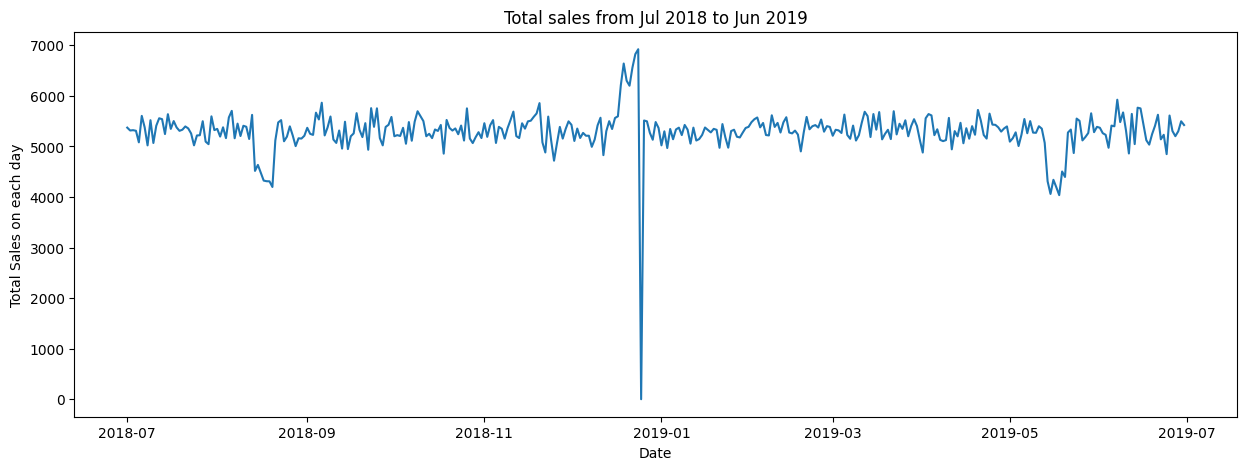

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(sales_day['DATE'],sales_day['TOT_SALES'])
plt.title('Total sales from Jul 2018 to Jun 2019')
plt.xlabel('Date')
plt.ylabel('Total Sales on each day')
plt.show()

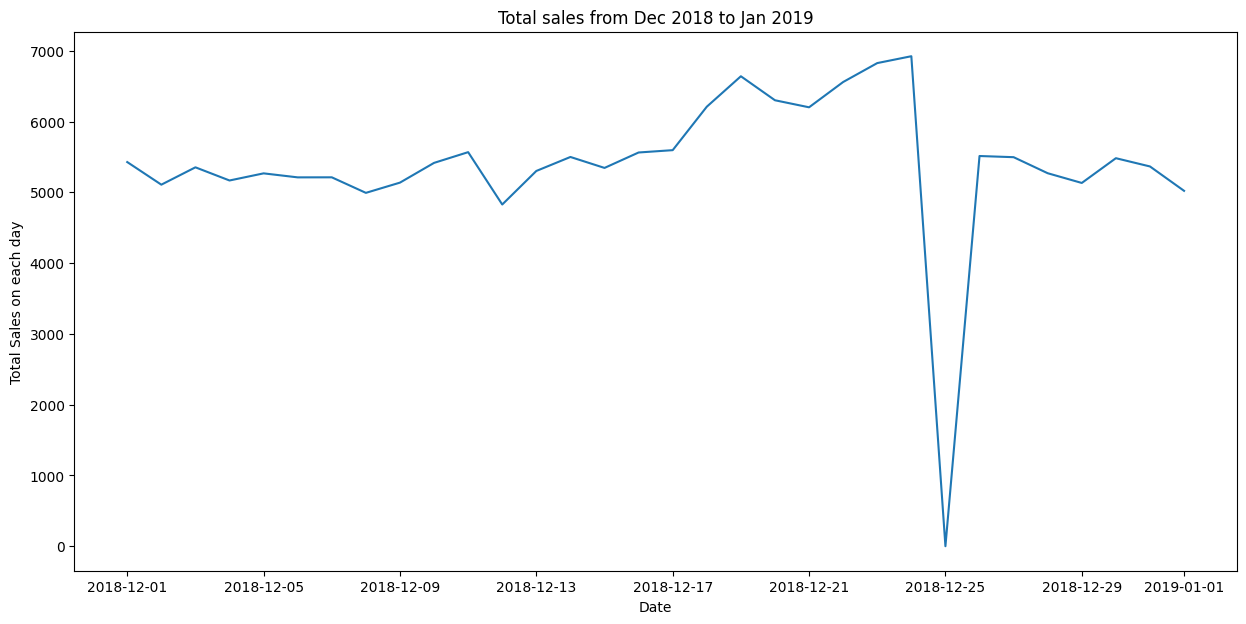

In [ ]:
time_criteria=(sales_day['DATE']>'2018-11-30') & (sales_day['DATE']<'2019-01-02')
plt.figure(figsize=(15,7))
plt.plot(sales_day[time_criteria]['DATE'],sales_day[time_criteria]['TOT_SALES'])
plt.title('Total sales from Dec 2018 to Jan 2019')
plt.xlabel('Date')
plt.ylabel('Total Sales on each day')
plt.show()

In [ ]:
df_unchange=df[df['DATE']!='2018-12-25']
df_unchange.groupby('LIFESTAGE')['LIFESTAGE'].count()

LIFESTAGE
MIDAGE SINGLES/COUPLES    25110
NEW FAMILIES               6919
OLDER FAMILIES            48594
OLDER SINGLES/COUPLES     54479
RETIREES                  49763
YOUNG FAMILIES            43592
YOUNG SINGLES/COUPLES     36377
Name: LIFESTAGE, dtype: int64

In [ ]:
df_unchange.groupby('PREMIUM_CUSTOMER')['PREMIUM_CUSTOMER'].count()

PREMIUM_CUSTOMER
Budget         93157
Mainstream    101988
Premium        69689
Name: PREMIUM_CUSTOMER, dtype: int64

In [ ]:
segment_sales=pd.DataFrame(df_unchange.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])['TOT_SALES'].sum()).reset_index()
segment_sales

,LIFESTAGE,PREMIUM_CUSTOMER,TOT_SALES
0,MIDAGE SINGLES/COUPLES,Budget,35514.80
1,MIDAGE SINGLES/COUPLES,Mainstream,90803.85
2,MIDAGE SINGLES/COUPLES,Premium,58432.65
3,NEW FAMILIES,Budget,21928.45
4,NEW FAMILIES,Mainstream,17013.90
5,NEW FAMILIES,Premium,11491.10
6,OLDER FAMILIES,Budget,168363.25
7,OLDER FAMILIES,Mainstream,103445.55
8,OLDER FAMILIES,Premium,80658.40
9,OLDER SINGLES/COUPLES,Budget,136769.80


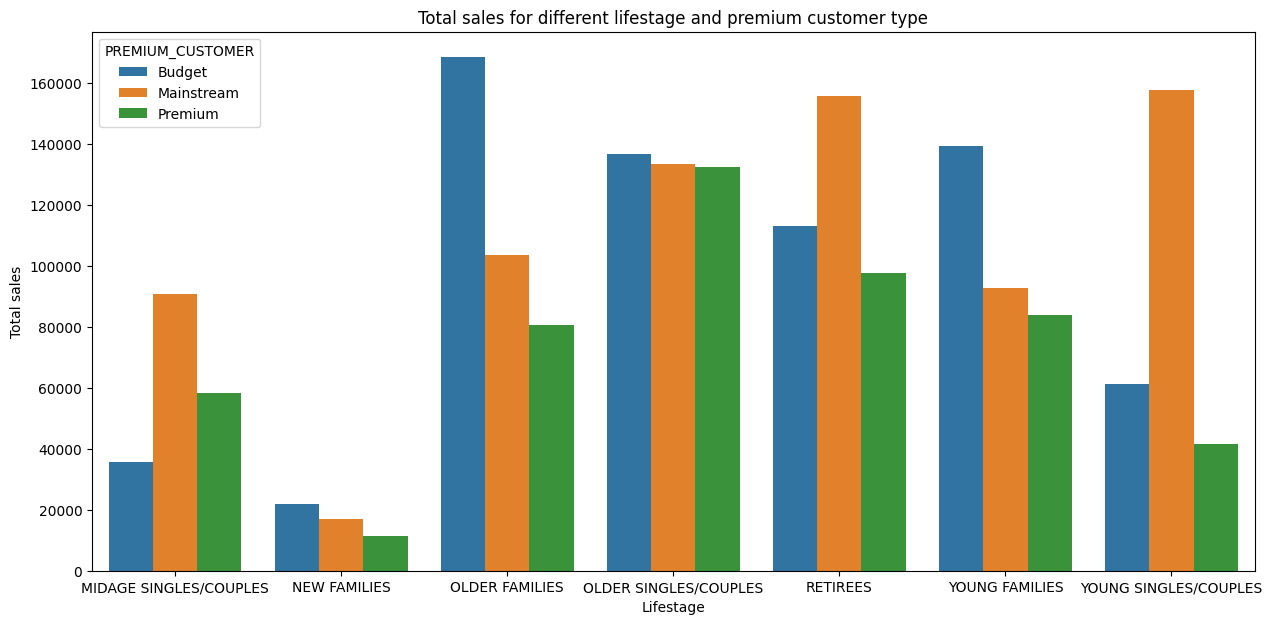

In [ ]:
plt.figure(figsize=(15,7))
sns.barplot(x='LIFESTAGE',y='TOT_SALES',hue='PREMIUM_CUSTOMER',data=segment_sales)
plt.xlabel('Lifestage')
plt.ylabel('Total sales')
plt.title('Total sales for different lifestage and premium customer type')
plt.show()

In [ ]:
pivot_sales=pd.pivot_table(segment_sales,index='LIFESTAGE',columns='PREMIUM_CUSTOMER',values='TOT_SALES',aggfunc=sum,margins=True,margins_name='Sub_Total')
pivot_sales

PREMIUM_CUSTOMER,Budget,Mainstream,Premium,Sub_Total
LIFESTAGE,,,,
MIDAGE SINGLES/COUPLES,35514.80,90803.85,58432.65,184751.30
NEW FAMILIES,21928.45,17013.90,11491.10,50433.45
OLDER FAMILIES,168363.25,103445.55,80658.40,352467.20
OLDER SINGLES/COUPLES,136769.80,133393.80,132263.15,402426.75
RETIREES,113147.80,155677.05,97646.05,366470.90
YOUNG FAMILIES,139345.85,92788.75,84025.50,316160.10
YOUNG SINGLES/COUPLES,61141.60,157621.60,41642.10,260405.30
Sub_Total,676211.55,750744.50,506158.95,1933115.00


In [ ]:
pivot_sales_percent=pivot_sales.apply(lambda x:x/pivot_sales['Sub_Total'][-1].round(2),axis=1).drop('Sub_Total',axis=1).drop('Sub_Total')

In [ ]:
pivot_sales_percent

PREMIUM_CUSTOMER,Budget,Mainstream,Premium
LIFESTAGE,,,
MIDAGE SINGLES/COUPLES,0.018372,0.046973,0.030227
NEW FAMILIES,0.011344,0.008801,0.005944
OLDER FAMILIES,0.087094,0.053512,0.041725
OLDER SINGLES/COUPLES,0.070751,0.069005,0.068420
RETIREES,0.058531,0.080532,0.050512
YOUNG FAMILIES,0.072084,0.048000,0.043466
YOUNG SINGLES/COUPLES,0.031629,0.081538,0.021541


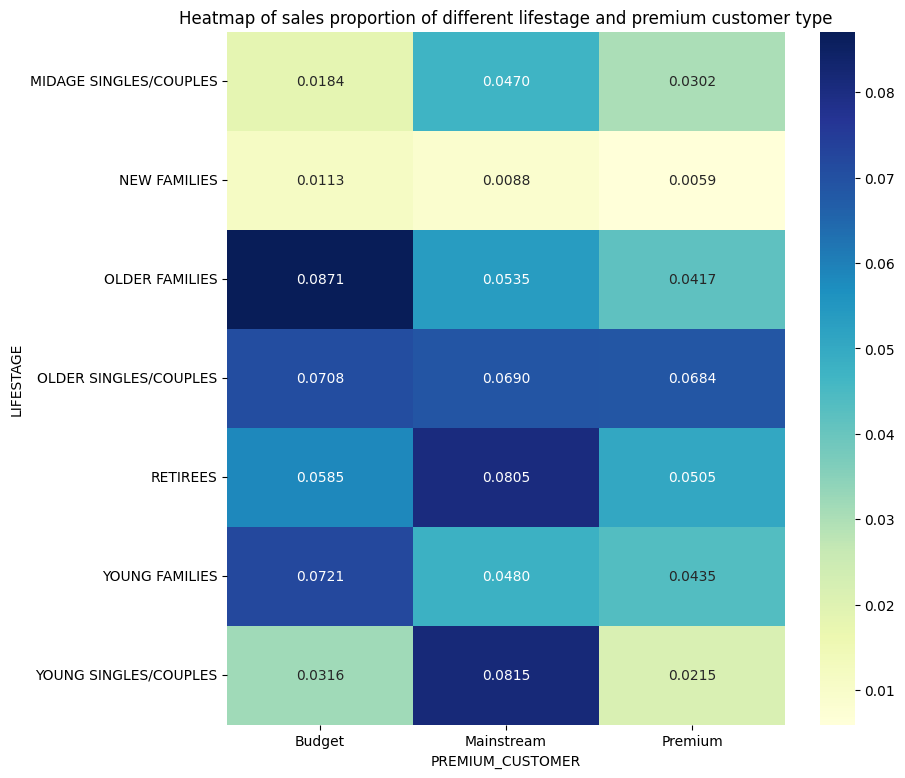

In [ ]:
plt.figure(figsize=(9,9))
sns.heatmap(pivot_sales_percent,annot=True,fmt='.4f',cmap='YlGnBu')
plt.title('Heatmap of sales proportion of different lifestage and premium customer type')
plt.show()

In [ ]:
customer_segment_num=df_unchange.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])['LYLTY_CARD_NBR'].nunique().reset_index()
customer_segment_num=customer_segment_num.rename(columns={'LYLTY_CARD_NBR':'NUM'})
customer_segment_num

,LIFESTAGE,PREMIUM_CUSTOMER,NUM
0,MIDAGE SINGLES/COUPLES,Budget,1504
1,MIDAGE SINGLES/COUPLES,Mainstream,3340
2,MIDAGE SINGLES/COUPLES,Premium,2431
3,NEW FAMILIES,Budget,1112
4,NEW FAMILIES,Mainstream,849
5,NEW FAMILIES,Premium,588
6,OLDER FAMILIES,Budget,4675
7,OLDER FAMILIES,Mainstream,2831
8,OLDER FAMILIES,Premium,2273
9,OLDER SINGLES/COUPLES,Budget,4929


In [ ]:
customer_num_pivot=pd.pivot_table(customer_segment_num,index='LIFESTAGE',columns='PREMIUM_CUSTOMER',values='NUM',aggfunc=sum)
customer_num_pivot

PREMIUM_CUSTOMER,Budget,Mainstream,Premium
LIFESTAGE,,,
MIDAGE SINGLES/COUPLES,1504,3340,2431
NEW FAMILIES,1112,849,588
OLDER FAMILIES,4675,2831,2273
OLDER SINGLES/COUPLES,4929,4930,4750
RETIREES,4454,6479,3872
YOUNG FAMILIES,4017,2728,2433
YOUNG SINGLES/COUPLES,3779,8088,2574


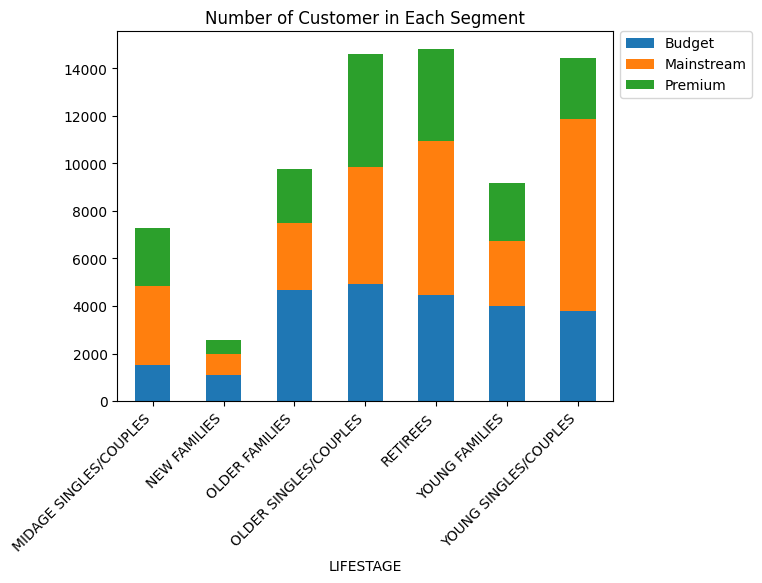

In [ ]:
customer_bar=customer_num_pivot.plot(kind='bar',stacked=True)
customer_bar.legend( bbox_to_anchor=(1, 1.02),
         loc='upper left')
customer_bar.set_xticklabels(customer_bar.get_xticklabels(), rotation=45, horizontalalignment='right')
customer_bar.set_title('Number of Customer in Each Segment')
plt.show()